In [8]:
import pandas as pd
import matplotlib as plt
from collections import Counter
import ast
from nrclex import NRCLex

df = pd.read_csv('cleaned_comments.csv')

def analyze_emotions(token_list):
    try:
        # Join the tokens into a single string
        text = ' '.join(token_list)
        # Create NRCLex object
        text_object = NRCLex(text)
        # Get raw emotion scores
        return text_object.raw_emotion_scores
    except Exception as e:
        print(f"Error processing tokens: {token_list}. Error: {e}")
        return {}

# Convert the Tokens column from string to list
df['Tokens'] = df['Tokens'].apply(ast.literal_eval)

# Aggregate tokens by Video ID
aggregated_tokens = df.groupby('Video ID')['Tokens'].sum().reset_index()

# Perform emotion analysis on the aggregated tokens
aggregated_tokens['Emotion_Scores'] = aggregated_tokens['Tokens'].apply(analyze_emotions)

# Remove the Tokens column
aggregated_tokens = aggregated_tokens.drop(columns=['Tokens'])

# Save the result to a new CSV file if needed
aggregated_tokens.to_csv('emotion_analysis_by_video.csv', index=False)

# Print the DataFrame to see the results
print(aggregated_tokens)

        Video ID                                     Emotion_Scores
0    -TeeIEh2IE8  {'anger': 488, 'anticipation': 1444, 'fear': 4...
1    -zkOLKMiX9c  {'joy': 705, 'positive': 921, 'surprise': 157,...
2    0K9eZCW-lvc  {'trust': 716, 'anger': 126, 'negative': 284, ...
3    0_BEwbnmRZ4  {'positive': 1475, 'surprise': 310, 'negative'...
4    5WH-PSs9hI8  {'joy': 3633, 'positive': 4639, 'surprise': 71...
..           ...                                                ...
101  yjhibJ-OqxE  {'positive': 11798, 'trust': 4905, 'joy': 8244...
102  zEXXe9Ef_R8  {'joy': 3414, 'positive': 4880, 'surprise': 99...
103  zPUSDU0hrwE  {'joy': 538, 'positive': 713, 'surprise': 129,...
104  za-ogD7nLi8  {'joy': 1809, 'positive': 2648, 'anticipation'...
105  zgacuXdzCmw  {'anticipation': 5811, 'joy': 7054, 'positive'...

[106 rows x 2 columns]


In [16]:
import pandas as pd
import ast

# Read the emotion analysis by video CSV file
df = pd.read_csv('emotion_analysis_by_video.csv')

# Function to get top 3 emotions
def get_top_3_emotions(emotion_scores_str):
    try:
        # Convert string representation of dictionary to an actual dictionary
        emotion_scores = ast.literal_eval(emotion_scores_str)
        # Sort emotion scores dictionary by value in descending order
        sorted_emotions = sorted(emotion_scores.items(), key=lambda x: x[1], reverse=True)
        # Get top 3 emotions
        top_3_emotions = sorted_emotions[:8]
        return top_3_emotions
    except Exception as e:
        print(f"Error processing emotion scores: {emotion_scores_str}. Error: {e}")
        return []

# Apply the function to the Emotion_Scores column
df['Top_3_Emotions'] = df['Emotion_Scores'].apply(get_top_3_emotions)

# Remove the Emotion_Scores column
df = df.drop(columns=['Emotion_Scores'])

# Save the result to a new CSV file
df.to_csv('top_5_emotions_by_video.csv', index=False)

# Print the DataFrame to see the results
print(df)


        Video ID                                     Top_3_Emotions
0    -TeeIEh2IE8  [(positive, 2959), (joy, 2132), (anticipation,...
1    -zkOLKMiX9c  [(positive, 921), (joy, 705), (trust, 321), (a...
2    0K9eZCW-lvc  [(positive, 1762), (joy, 1258), (trust, 716), ...
3    0_BEwbnmRZ4  [(positive, 1475), (joy, 965), (negative, 538)...
4    5WH-PSs9hI8  [(positive, 4639), (joy, 3633), (trust, 1683),...
..           ...                                                ...
101  yjhibJ-OqxE  [(positive, 11798), (joy, 8244), (trust, 4905)...
102  zEXXe9Ef_R8  [(positive, 4880), (joy, 3414), (trust, 1974),...
103  zPUSDU0hrwE  [(positive, 713), (joy, 538), (trust, 241), (a...
104  za-ogD7nLi8  [(positive, 2648), (joy, 1809), (trust, 1133),...
105  zgacuXdzCmw  [(positive, 10595), (joy, 7054), (trust, 6461)...

[106 rows x 2 columns]


In [17]:
import pandas as pd
import ast

# Read the emotion analysis by video CSV file
df = pd.read_csv('top_5_emotions_by_video.csv')

# Function to calculate percentage of each emotion for each video
def calculate_emotion_percentages(emotion_scores_str):
    try:
        # Convert string representation of list to an actual list of tuples
        emotion_scores_list = ast.literal_eval(emotion_scores_str)
        
        # Extract emotion occurrences
        emotion_occurrences = {emotion: occurrence for emotion, occurrence in emotion_scores_list}
        
        # Calculate total occurrences
        total_occurrences = sum(emotion_occurrences.values())
        
        # Calculate percentage of each emotion
        emotion_percentages = {emotion: (occurrence / total_occurrences) * 100 
                               for emotion, occurrence in emotion_occurrences.items()}
        
        return emotion_percentages
    except Exception as e:
        print(f"Error processing emotion scores: {emotion_scores_str}. Error: {e}")
        return {}

# Apply the function to the Top_3_Emotions column
df['Emotion_Percentages'] = df['Top_3_Emotions'].apply(calculate_emotion_percentages)

# Remove the Top_3_Emotions column
df = df.drop(columns=['Top_3_Emotions'])

# Save the result to a new CSV file
df.to_csv('emotion_percentages_by_video.csv', index=False)

# Print the DataFrame to see the results
print(df)


        Video ID                                Emotion_Percentages
0    -TeeIEh2IE8  {'positive': 26.61928751349406, 'joy': 19.1795...
1    -zkOLKMiX9c  {'positive': 32.53267396679618, 'joy': 24.9028...
2    0K9eZCW-lvc  {'positive': 33.207689408217114, 'joy': 23.709...
3    0_BEwbnmRZ4  {'positive': 30.678036605657237, 'joy': 20.070...
4    5WH-PSs9hI8  {'positive': 33.39091628877852, 'joy': 26.1498...
..           ...                                                ...
101  yjhibJ-OqxE  {'positive': 30.064726568472555, 'joy': 21.008...
102  zEXXe9Ef_R8  {'positive': 28.885995027820528, 'joy': 20.208...
103  zPUSDU0hrwE  {'positive': 34.71275559883155, 'joy': 26.1927...
104  za-ogD7nLi8  {'positive': 29.732764428475182, 'joy': 20.312...
105  zgacuXdzCmw  {'positive': 27.416934064796607, 'joy': 18.253...

[106 rows x 2 columns]


In [36]:
import csv
import ast
from collections import defaultdict

# Initialize a dictionary to store the sum of each emotion
emotion_sums = defaultdict(float)

# Initialize a counter for the number of videos
num_videos = 0

with open('emotion_percentages_by_video.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        num_videos += 1
        emotions = ast.literal_eval(row['Emotion_Percentages'])
        for emotion, percentage in emotions.items():
            emotion_sums[emotion] += percentage

# Calculate the average for each emotion
emotion_averages = {emotion: total / num_videos for emotion, total in emotion_sums.items()}

# Print the averages
for emotion, average in emotion_averages.items():
    print(f"Average {emotion}: {average}")


Average positive: 30.562958788938666
Average joy: 21.5396921048531
Average anticipation: 10.959594224231987
Average trust: 12.361634354726373
Average negative: 8.745330276864532
Average surprise: 5.400383315323161
Average sadness: 5.037434056669178
Average disgust: 1.3275440156189955
Average fear: 2.2144295451180405
Average anger: 1.8509993176559614


In [34]:
import csv
import ast

def assign_emotion(row):
    emotions = ast.literal_eval(row['Emotion_Percentages'])
    remaining_emotions = emotions.copy()
    if emotions['positive'] + emotions['joy'] > 55:
        return 'positive_joy'
    else:
        del remaining_emotions['positive']
        del remaining_emotions['joy']
    if emotions['anticipation'] + emotions['trust'] > 25:
        return 'anticipation_trust'
    else:
        del remaining_emotions['anticipation']
        del remaining_emotions['trust']
    if emotions['negative'] > 10:
        return 'negative'
    else:
        del remaining_emotions['negative']
    # If none of the above conditions are met, assign the emotion with the highest percentage
    # from the remaining emotions
    return max(remaining_emotions, key=remaining_emotions.get)

with open('emotion_percentages_by_video.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        dominant_emotion = assign_emotion(row)
        print(f"Video ID: {row['Video ID']}, Dominant Emotion: {dominant_emotion}")


Video ID: -TeeIEh2IE8, Dominant Emotion: surprise
Video ID: -zkOLKMiX9c, Dominant Emotion: positive_joy
Video ID: 0K9eZCW-lvc, Dominant Emotion: positive_joy
Video ID: 0_BEwbnmRZ4, Dominant Emotion: negative
Video ID: 5WH-PSs9hI8, Dominant Emotion: positive_joy
Video ID: 5vNoHwgoIjw, Dominant Emotion: surprise
Video ID: 5zvsAwsEwPg, Dominant Emotion: positive_joy
Video ID: 7R2RyqU4hjI, Dominant Emotion: surprise
Video ID: 7Z76MiQv0zg, Dominant Emotion: positive_joy
Video ID: 7cGmj0AR3z8, Dominant Emotion: sadness
Video ID: 80z6drP0NY8, Dominant Emotion: anticipation_trust
Video ID: 8MkcEzfyCFM, Dominant Emotion: surprise
Video ID: 9KapEXWynrA, Dominant Emotion: positive_joy
Video ID: 9OvibwfflDg, Dominant Emotion: positive_joy
Video ID: 9p9sGtV4UoU, Dominant Emotion: surprise
Video ID: ATGZ58IRwfE, Dominant Emotion: positive_joy
Video ID: AkTkUOOCZ-w, Dominant Emotion: surprise
Video ID: AwhBTrzzqeg, Dominant Emotion: surprise
Video ID: Axg27gwEqCE, Dominant Emotion: positive_joy
Video

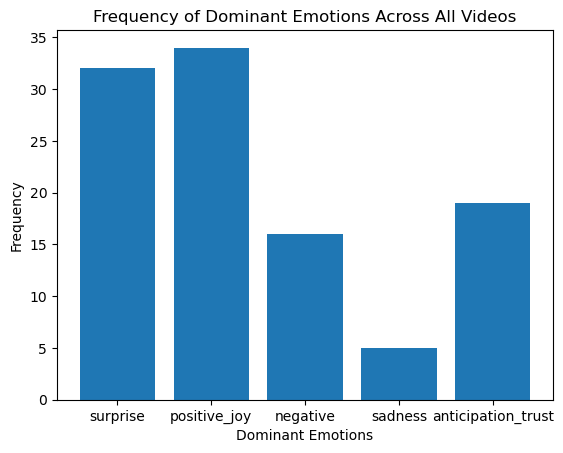

In [35]:
import csv
import ast
from collections import Counter
import matplotlib.pyplot as plt

def assign_emotion(row):
    emotions = ast.literal_eval(row['Emotion_Percentages'])
    remaining_emotions = emotions.copy()
    if emotions['positive'] + emotions['joy'] > 55:
        return 'positive_joy'
    else:
        del remaining_emotions['positive']
        del remaining_emotions['joy']
    if emotions['anticipation'] + emotions['trust'] > 25:
        return 'anticipation_trust'
    else:
        del remaining_emotions['anticipation']
        del remaining_emotions['trust']
    if emotions['negative'] > 10:
        return 'negative'
    else:
        del remaining_emotions['negative']
    # If none of the above conditions are met, assign the emotion with the highest percentage
    # from the remaining emotions
    return max(remaining_emotions, key=remaining_emotions.get)

all_emotion_scores = Counter()

with open('emotion_percentages_by_video.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        dominant_emotion = assign_emotion(row)
        all_emotion_scores.update({dominant_emotion: 1})

# Create a bar chart
plt.bar(all_emotion_scores.keys(), all_emotion_scores.values())
plt.title('Frequency of Dominant Emotions Across All Videos')
plt.xlabel('Dominant Emotions')
plt.ylabel('Frequency')
plt.show()


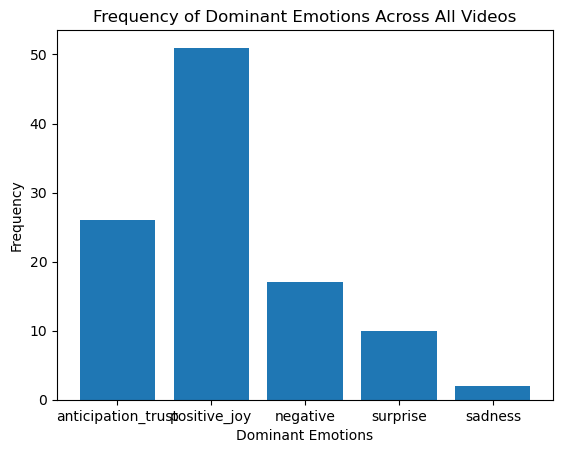

-TeeIEh2IE8, anticipation_trust
-zkOLKMiX9c, positive_joy
0K9eZCW-lvc, positive_joy
0_BEwbnmRZ4, negative
5WH-PSs9hI8, positive_joy
5vNoHwgoIjw, positive_joy
5zvsAwsEwPg, positive_joy
7R2RyqU4hjI, surprise
7Z76MiQv0zg, positive_joy
7cGmj0AR3z8, sadness
80z6drP0NY8, anticipation_trust
8MkcEzfyCFM, surprise
9KapEXWynrA, positive_joy
9OvibwfflDg, positive_joy
9p9sGtV4UoU, positive_joy
ATGZ58IRwfE, positive_joy
AkTkUOOCZ-w, positive_joy
AwhBTrzzqeg, positive_joy
Axg27gwEqCE, positive_joy
BDA6rPA0Fcs, anticipation_trust
D-qQneOnJl0, anticipation_trust
D_gkHpZ2oRI, positive_joy
EB_Z-8kBNm8, positive_joy
EobMnSpjfTU, surprise
ExTP2rYqguE, positive_joy
FIDsKWis3jo, positive_joy
GiYK_6FxNts, anticipation_trust
HphRKCxIK_Q, positive_joy
IxlzRwNX63A, positive_joy
JKUWL85Betk, negative
Jzqu48uup54, anticipation_trust
KHfP3InQc94, anticipation_trust
KIqQ0gowzt4, positive_joy
KuYsILv6Fd0, positive_joy
KyI8i1-cN8s, anticipation_trust
Li8ubUzLB90, positive_joy
LpVraZRIjrY, surprise
NXrwxbxeqCE, positi

In [44]:
import csv
import ast
from collections import Counter
import matplotlib.pyplot as plt

def assign_emotion(row):
    emotions = ast.literal_eval(row['Emotion_Percentages'])
    remaining_emotions = emotions.copy()
    if emotions['positive'] + emotions['joy'] > 53.1:
        return 'positive_joy'
    else:
        del remaining_emotions['positive']
        del remaining_emotions['joy']
    if emotions['anticipation'] + emotions['trust'] > 24.32:
        return 'anticipation_trust'
    else:
        del remaining_emotions['anticipation']
        del remaining_emotions['trust']
    if emotions['negative'] > 9.75:
        return 'negative'
    else:
        del remaining_emotions['negative']
    # If none of the above conditions are met, assign the emotion with the highest percentage
    # from the remaining emotions
    return max(remaining_emotions, key=remaining_emotions.get)

all_emotion_scores = Counter()

with open('emotion_percentages_by_video.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        dominant_emotion = assign_emotion(row)
        all_emotion_scores.update({dominant_emotion: 1})

# Create a bar chart
plt.bar(all_emotion_scores.keys(), all_emotion_scores.values())
plt.title('Frequency of Dominant Emotions Across All Videos')
plt.xlabel('Dominant Emotions')
plt.ylabel('Frequency')
plt.show()

with open('emotion_percentages_by_video.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        dominant_emotion = assign_emotion(row)
        print(f"{row['Video ID']}, {dominant_emotion}")
        
with open('emotion_percentages_by_video.csv', 'r') as f, open('sd_sentiment.csv', 'w', newline='') as outfile:
    reader = csv.DictReader(f)
    writer = csv.writer(outfile)
    writer.writerow(['Video ID', 'Dominant Emotion'])
    for row in reader:
        dominant_emotion = assign_emotion(row)
        writer.writerow([row['Video ID'], dominant_emotion])


In [21]:

import csv 

# Define weights for each emotion
weights = {
    'positive': 0,
    'joy': 0,
    'anticipation': 1.0,
    'trust': 1.0,
    'negative': 1.5,  # assign higher weight
    'surprise': 1.0,
    'sadness': 1.5,
    'disgust': 1.5,
    'fear': 1.5,
    'anger': 1.5
}

# Read the CSV file
with open('emotion_percentages_by_video.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header
    for row in reader:
        video_id = row[0]
        emotion_percentages = ast.literal_eval(row[1])  # Convert string to dictionary

        # Calculate weighted scores for each emotion
        weighted_scores = {emotion: percentage * weights[emotion] for emotion, percentage in emotion_percentages.items()}

        # Get the emotion with the highest weighted score
        dominant_emotion = max(weighted_scores, key=weighted_scores.get)

        print(f'Dominant emotion for video {video_id} is {dominant_emotion}')


Dominant emotion for video -TeeIEh2IE8 is negative
Dominant emotion for video -zkOLKMiX9c is trust
Dominant emotion for video 0K9eZCW-lvc is trust
Dominant emotion for video 0_BEwbnmRZ4 is negative
Dominant emotion for video 5WH-PSs9hI8 is trust
Dominant emotion for video 5vNoHwgoIjw is trust
Dominant emotion for video 5zvsAwsEwPg is trust
Dominant emotion for video 7R2RyqU4hjI is negative
Dominant emotion for video 7Z76MiQv0zg is trust
Dominant emotion for video 7cGmj0AR3z8 is negative
Dominant emotion for video 80z6drP0NY8 is negative
Dominant emotion for video 8MkcEzfyCFM is anticipation
Dominant emotion for video 9KapEXWynrA is negative
Dominant emotion for video 9OvibwfflDg is trust
Dominant emotion for video 9p9sGtV4UoU is negative
Dominant emotion for video ATGZ58IRwfE is trust
Dominant emotion for video AkTkUOOCZ-w is trust
Dominant emotion for video AwhBTrzzqeg is negative
Dominant emotion for video Axg27gwEqCE is negative
Dominant emotion for video BDA6rPA0Fcs is negative
Dom

In [7]:
df = pd.read_csv('sd_topics.csv')

def analyze_emotions(token_list):
    try:
        # Join the tokens into a single string
        text = ' '.join(token_list)
        # Create NRCLex object
        text_object = NRCLex(text)
        # Get raw emotion scores
        return text_object.raw_emotion_scores
    except Exception as e:
        print(f"Error processing tokens: {token_list}. Error: {e}")
        return {}



# Aggregate tokens by Video ID
aggregated_tokens = df.groupby('Video ID')['Topics'].sum().reset_index()

# Perform emotion analysis on the aggregated tokens
aggregated_tokens['Emotion_Scores'] = aggregated_tokens['Topics'].apply(analyze_emotions)



# Save the result to a new CSV file if needed
aggregated_tokens.to_csv('emotion_analysis_by_video.csv', index=False)

# Print the DataFrame to see the results
print(aggregated_tokens)

        Video ID                                             Topics  \
0    -TeeIEh2IE8  gallery, second, elmo, remember, trophies, kee...   
1    -zkOLKMiX9c               woman, art, pepper, old, body, white   
2    0K9eZCW-lvc  tate, kitchen, body, sweet, something, dress, ...   
3    0_BEwbnmRZ4  sounds, leave, panic, humor, jazzy, guy, hilar...   
4    5WH-PSs9hI8  mama, fracking, drag, black, disco, color, clo...   
..           ...                                                ...   
101  yjhibJ-OqxE  whole, sign, hear, art, sisters, used, glad, g...   
102  zEXXe9Ef_R8  lilly, swan, couple, bedroom, refugees, man, c...   
103  zPUSDU0hrwE  cottage, low, woman, chastain, color, colors, ...   
104  za-ogD7nLi8  sunglasses, husband, art, black, bowls, bowl, ...   
105  zgacuXdzCmw  respect, black, dude, inside, genius, white, c...   

    Emotion_Scores  
0               {}  
1               {}  
2               {}  
3               {}  
4               {}  
..             ...  


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Define keywords related to a house
house_keywords = ['house', 'home', 'furniture', 'interior', 'design', 'architecture', 'room', 'kitchen', 'bathroom', 'bedroom', 'living', 'garden', 'yard', 'roof', 'wall', 'floor']

# Define words indicating a reference to a person
person_indicators = ['he', 'she', 'guy', 'sweet', 'loveable', 'guest', 'friend', 'friendship', 'funny', 'genuine' 'person', 'people', 'man', 'woman', 'they', 'their', 'himself', 'herself', 'themselves']

# Initializes a dictionary called house_details where each keyword is a key, and the corresponding value is an empty list.
house_details = {keyword: [] for keyword in house_keywords}

for video_id in filtered_video_ids:
    # Get comments for the current video
    comments = get_video_comments(video_id)

    # Initialize variables to calculate average sentiment
    total_compound_score = 0
    num_comments = 0

    # Analyze sentiment for each comment
    for comment in comments:
        # Check if the comment contains any words indicating a reference to a person
        if any(word.lower() in person_indicators for word in comment.split()):
            continue  # Skip comments about a person
        
        # Look for mentions of house parts in the comment
        for word in comment.lower().split():
            if word in house_keywords:
                house_details[word].append(comment)  # Add the comment to the corresponding list in house_details

        # Get sentiment scores
        scores = sid.polarity_scores(comment)
        
        # Print sentiment scores for debugging purposes

        
        # Add compound score to total
        total_compound_score += scores['compound']
        num_comments += 1

    # Calculate average sentiment score for the video
    avg_sentiment_score = total_compound_score / num_comments if num_comments != 0 else 0

    # Print video ID, average sentiment score, and house details
    print(f'Video ID: {video_id}')
    print(f'Average Sentiment Score: {avg_sentiment_score}')
    print(f'House Details: {house_details}')
    print()
s